In [ ]:
import numpy as np

import keras
from keras.datasets import fashion_mnist
from keras import layers

In [ ]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()


x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [ ]:
print(x_train.shape)   # (60000, 784)
print(x_test.shape)    # (10000, 784)

In [3]:
encoding_dim = 32  # Size of our encoded representations 

# encoder
input_img = keras.Input(shape=(x_train.shape[1],))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

# decoder
decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(x_train.shape[1], activation='sigmoid')(decoded) 

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_10 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_11 (Dense)             (None, 128)               8320      
______________________________________________

In [4]:
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True,
                validation_data=(x_test, x_test))



Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 107us/step - loss: 0.3786 - val_loss: 0.3192
Epoch 2/50
60000/60000 [==============================] - 5s 85us/step - loss: 0.3101 - val_loss: 0.3096
Epoch 3/50
60000/60000 [==============================] - 5s 81us/step - loss: 0.3020 - val_loss: 0.3013
Epoch 4/50
60000/60000 [==============================] - 5s 75us/step - loss: 0.2972 - val_loss: 0.2973
Epoch 5/50
60000/60000 [==============================] - 5s 76us/step - loss: 0.2938 - val_loss: 0.2963
Epoch 6/50
60000/60000 [==============================] - 5s 77us/step - loss: 0.2915 - val_loss: 0.2924
Epoch 7/50
60000/60000 [==============================] - 5s 85us/step - loss: 0.2896 - val_loss: 0.2909
Epoch 8/50
60000/60000 [==============================] - 5s 83us/step - loss: 0.2882 - val_loss: 0.2897
Epoch 9/50
60000/60000 [==============================] - 5s 76us/step - loss: 0.2869 - val_loss: 0.2891
Epo

In [5]:
decoded_imgs = autoencoder.predict(x_test)


First row is orignal images


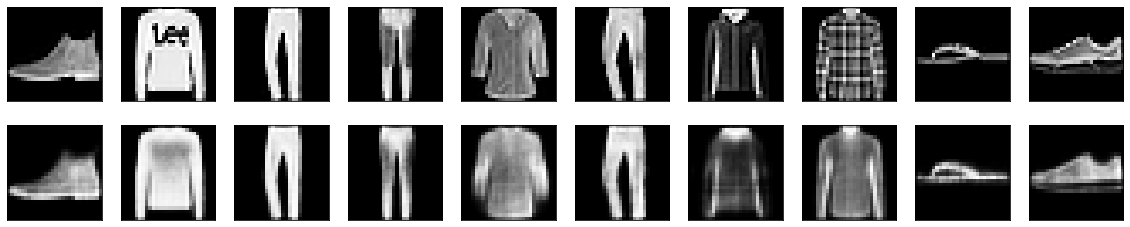

Second row is reconstrcuted images


In [7]:
import matplotlib.pyplot as plt

print('First row is orignal images')
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
print('Second row is reconstrcuted images')

Encoded representations


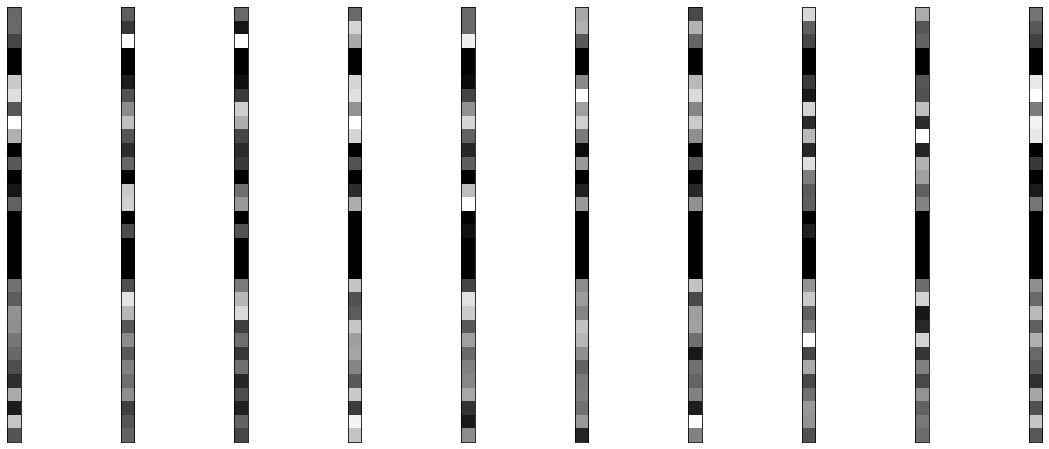

In [8]:
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

print('Encoded representations')
n = 10
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape((1, 4 * 8)).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
